In [1]:
# Importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# Carregar o dataset
df = pd.read_csv('/content/drive/MyDrive/train_titanic.csv')

# Exploração Inicial e tratamento dos dados:
1. **PassengerId:**
   - Número de identificação do passageiro.

2. **Survived:**
   - Indica se o passageiro sobreviveu (1) ou não (0)

3. **Pclass:**
   - Classe do ticket do passageiro (1ª, 2ª ou 3ª)

4. **Name:**
   - Nome do passageiro

5. **Sex:**
   - Gênero do passageiro (masculino ou feminino)

6. **Age:**
   - Idade do passageiro

7. **SibSp:**
   - Número de irmãos/cônjuges registrados no bilhete do passageiro

8. **Parch:**
   - Número de pais/filhos registrados no bilhete do passageiro

9. **Ticket:**
   - Número do ticket do passageiro

10. **Fare:**
    - Tarifa paga pelo passageiro

11. **Cabin:**
    - Número da cabine do passageiro

12. **Embarked:**
    - Porto de embarque do passageiro (C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
# Visualizar as primeiras linhas do DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Informações básicas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# Verificação de linhas duplicadas
df.duplicated().sum()

0

In [6]:
# Verificar valores ausentes em cada coluna %
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [7]:
# Tratamento de valores ausentes
tratamento_dados = df.drop('Cabin', axis=1)
tratamento_dados.dropna(subset=['Embarked'],inplace=True)
tratamento_dados['Age'].fillna(tratamento_dados['Age'].median(), inplace=True)
tratamento_dados.isnull().sum()/df.shape[0]*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [8]:
# Excluindo colunas 'PassengerId', 'Name' e 'Ticket' para preparação do modelo
tratamento_dados.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [9]:
# Exibindo os valores únicos das colunas
print(tratamento_dados.dtypes,'\n')
tratamento_dados.dtypes
colunas= ['Sex','Embarked','Survived','Pclass']

for coluna in colunas:
  print(tratamento_dados[coluna].unique())

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object 

['male' 'female']
['S' 'C' 'Q']
[0 1]
[3 1 2]


In [10]:
# Substituição de variáveis categóricas na coluna 'Sex' e 'Embarked' para uma representação numérica:
tratamento_dados.loc[tratamento_dados['Sex'] == 'male', 'Sex'] = 0
tratamento_dados.loc[tratamento_dados['Sex'] == 'female', 'Sex'] = 1

tratamento_dados.loc[tratamento_dados['Embarked'] == 'S', 'Embarked'] = 0
tratamento_dados.loc[tratamento_dados['Embarked'] == 'C', 'Embarked'] = 1
tratamento_dados.loc[tratamento_dados['Embarked'] == 'Q', 'Embarked'] = 2

tratamento_dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [11]:
# Convertendo colunas object para int
tratamento_dados['Sex'] = tratamento_dados['Sex'].astype('Int64')
tratamento_dados['Embarked'] = tratamento_dados['Embarked'].astype('Int64')
tratamento_dados.dtypes

Survived      int64
Pclass        int64
Sex           Int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      Int64
dtype: object

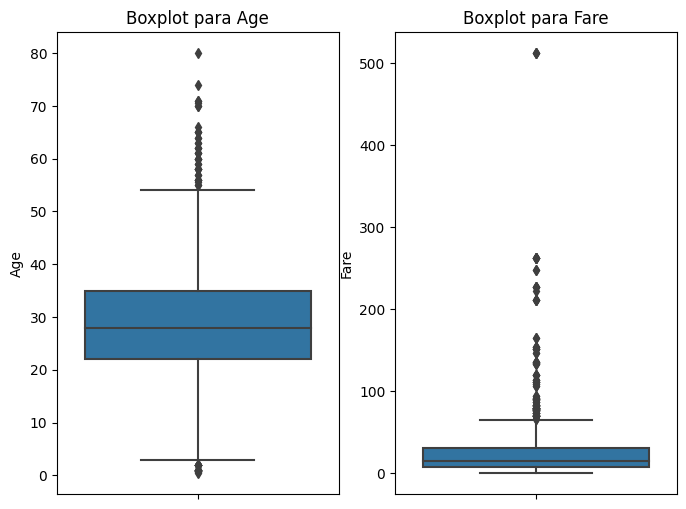

In [12]:
# Verificando outliers

# Criar boxplots para duas colunas diferentes
plt.figure(figsize=(8, 6))

# Boxplot para Coluna Age
plt.subplot(1, 2, 1)
sns.boxplot(y=tratamento_dados['Age'])
plt.title('Boxplot para Age')

# Boxplot para Coluna Fare
plt.subplot(1, 2, 2)
sns.boxplot(y=tratamento_dados['Fare'])
plt.title('Boxplot para Fare')

plt.show()

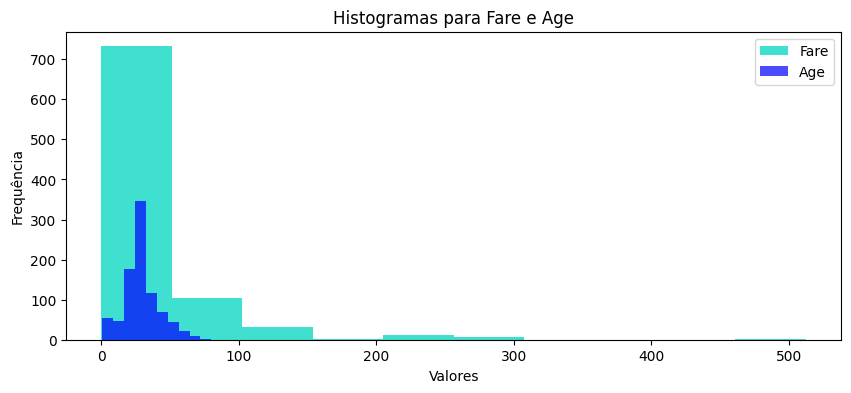

In [13]:
# Criar um subplot com dois histogramas
plt.figure(figsize=(10, 4))

# Histograma para Fare
plt.hist(tratamento_dados['Fare'], color='turquoise', alpha=1, label='Fare')

# Histograma para Age
plt.hist(tratamento_dados['Age'], color='blue', alpha=0.7, label='Age')

# Configurações gerais
plt.title('Histogramas para Fare e Age')
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.legend()

plt.show()

In [14]:
# Tratando outliers de 'Age' e 'Fare' pelo método de amplitude interquartil
def tratar_outliers(coluna):
  Q1 = coluna.quantile(0.25)
  Q3 = coluna.quantile(0.75)
  IQR = Q3-Q1
  valor_min = Q1 - 1.5*IQR
  valor_max = Q3 + 1.5*IQR
  mediana_coluna = coluna.median()
  tratamento_dados.loc[(coluna > valor_max) | (coluna < valor_min), coluna.name] = mediana_coluna

tratar_outliers(tratamento_dados['Age'])
tratar_outliers(tratamento_dados['Fare'])

In [15]:
# Padronizando dados com StandardScaler
scaler = StandardScaler()
tratamento_dados['Age']= scaler.fit_transform(tratamento_dados[['Age']])
tratamento_dados['Fare']= scaler.fit_transform(tratamento_dados[['Age']])

In [16]:
tratamento_dados.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,-0.660294,1,0,-0.660294,0
1,1,1,1,0.973386,1,0,0.973386,1
2,1,3,1,-0.251874,0,0,-0.251874,0
3,1,1,1,0.667071,1,0,0.667071,0
4,0,3,0,0.667071,0,0,0.667071,0


# Treinamento e criação do modelo

In [17]:
# Criando modelo com regressão linear
X = tratamento_dados.drop('Survived', axis=1)
y = tratamento_dados['Survived']

modelo = LinearRegression().fit(X,y)

# Tratamento dos dados de test

In [18]:
test = pd.read_csv('/content/drive/MyDrive/test_titanic.csv')

In [19]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
tratamento_test = test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

In [21]:
# Substituição de variáveis categóricas na coluna 'Sex' e 'Embarked' para uma representação numérica:
tratamento_test.loc[tratamento_test['Sex'] == 'male', 'Sex'] = 0
tratamento_test.loc[tratamento_test['Sex'] == 'female', 'Sex'] = 1

tratamento_test.loc[tratamento_test['Embarked'] == 'S', 'Embarked'] = 0
tratamento_test.loc[tratamento_test['Embarked'] == 'C', 'Embarked'] = 1
tratamento_test.loc[tratamento_test['Embarked'] == 'Q', 'Embarked'] = 2

tratamento_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [22]:
# Convertendo colunas object para int
tratamento_test['Sex'] = tratamento_test['Sex'].astype('Int64')
tratamento_test['Embarked'] = tratamento_test['Embarked'].astype('Int64')
tratamento_test.dtypes

Pclass        int64
Sex           Int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      Int64
dtype: object

In [23]:
# Verificando valores ausentes em %
tratamento_test.isnull().sum()/tratamento_test.shape[0]*100

Pclass       0.000000
Sex          0.000000
Age         20.574163
SibSp        0.000000
Parch        0.000000
Fare         0.239234
Embarked     0.000000
dtype: float64

In [24]:
# Tratando valores ausentes
tratamento_test['Fare'].fillna(tratamento_test['Fare'].median(), inplace=True)
tratamento_test['Age'].fillna(tratamento_test['Age'].median(), inplace=True)
tratamento_test.isnull().sum()/tratamento_test.shape[0]*100

Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [25]:
# Padronizando dados de Test com StandardScaler
tratamento_test['Age']= scaler.fit_transform(tratamento_test[['Age']])
tratamento_test['Fare']= scaler.fit_transform(tratamento_test[['Age']])

In [26]:
# Prevendo 'Survived'
y_pred = modelo.predict(tratamento_test)

In [27]:
# Criação do arquivo csv para a competição do Kaggle: "Titanic - Machine Learning from Disaster."
data = {'PassengerId': test['PassengerId'], 'Survived': y_pred}
resultado_titanic = pd.DataFrame(data)
resultado_titanic.loc[resultado_titanic['Survived'] >= 0.5, 'Survived'] = 1
resultado_titanic.loc[resultado_titanic['Survived'] < 0.5, 'Survived'] = 0
resultado_titanic['Survived'] = resultado_titanic['Survived'].astype(int)

resultado_titanic.to_csv('resultado_titanic5.csv', index=False)

In [28]:
resultado_titanic.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
